In [1]:
#!/usr/bin/env python
from coffea.nanoevents import NanoAODSchema
from coffea import hist
NanoAODSchema.warn_missing_crossrefs = True

from HNLAnalysis import HNLAnalysis
from samples import signal_samples, Data_samples, MCbackground_samples, plot_scale
from luminosity.xsecs import xsecs
from plot_helpers import compute_lumi, ratio_plot, ratio_plot_plus_signal

from cycler import cycler
import pickle
import matplotlib.pyplot as plt
import numpy as np
import warnings
import os

tag = 'full_run'
channel = 'tte'
save_dir = '/Users/debryas/Desktop/PhD_work/HNL_tau_analysis/hnl-coffea-analysis/figures/'+tag+'/'+channel+'/' #directory where to store figures
signal_region = 'D' # signal region

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

#load results
with open(f'results/result_{tag}_channel{channel}_region{signal_region}.pkl', 'rb') as f:
    result = pickle.load(f)
with open (f'results/counter_{tag}.pkl', 'rb') as f:
    event_counter = pickle.load(f)

#compute the luminosity of each data samples
luminosity = {}
for element in Data_samples:
    luminosity[element] = compute_lumi(element)

#compute the integrated luminosity of data samples for area A, B, C and D in /pb
lumi_EGamma_2018 = 0
lumi_SingleMuon_2018 = 0
lumi_Tau_2018 = 0
for element in Data_samples:
    if element[:-1] == 'EGamma_2018':
        lumi_EGamma_2018 += luminosity[element]
    if element[:-1] == 'SingleMuon_2018':
        lumi_SingleMuon_2018 += luminosity[element]
    if element[:-1] == 'Tau_2018':
        lumi_Tau_2018 += luminosity[element]

# store all the samples 
Data_samples_merged = {}
for s in Data_samples:
    Data_samples_merged[s[0:-1]] = Data_samples[s]
samples = {**signal_samples, **Data_samples_merged, **MCbackground_samples}

#list of background, hnl and data to be plot
main_background = [
    'DYJets_To_LL_M-50-amcatnloFXFX',
    'TT_To_2L2Nu',
    'WJets_To_LNu',
    'WW']

other_background = [
    'EWK_WMinus2Jets_W_To_LNu_M-50',
    'EWK_WPlus2Jets_W_To_LNu_M-50',
    'EWK_Z2Jets_Z_To_LL_M-50',
    'ST_t-channel_antitop_4f_InclusiveDecays',
    'ST_t-channel_top_4f_InclusiveDecays',
    'ST_tW_antitop_5f_inclusiveDecays',
    'ST_tW_top_5f_inclusiveDecays',
    'TT_To_Hadronic',
    'TT_To_SemiLeptonic',
    'TTWJets_To_LNu',
    'TTWW',
    'TTWZ',
    'TTZ_To_LLNuNu_M-10',
    'TTZZ',
    'WZ',
    'ZZ',
    'WWW',
    'WWZ',
    'WZZ',
    'ZZZ']

QCD_background = [
    'QCD_Pt_15to30',
    'QCD_Pt_30to50',
    'QCD_Pt_50to80',
    'QCD_Pt_80to120',
    'QCD_Pt_120to170',
    'QCD_Pt_170to300',
    'QCD_Pt_300to470']

hnl = ['HNL_tau_M-300']

data = ['EGamma_2018','SingleMuon_2018','Tau_2018']

#sample that need to be scaled
scale_samples = main_background + other_background + QCD_background + hnl

# for QCD background estimation:
#load results region A
with open(f'results/result_{tag}_channel{channel}_regionA.pkl', 'rb') as f:
    result_regionA = pickle.load(f)

#load results region B
with open(f'results/result_{tag}_channel{channel}_regionB.pkl', 'rb') as f:
    result_regionB = pickle.load(f)

#load results region C
with open(f'results/result_{tag}_channel{channel}_regionC.pkl', 'rb') as f:
    result_regionC = pickle.load(f)

var_axis = {
    "pt"  : [300, 0., 1500.], # pt axis
    "et" : [30,  -3.1415927, 3.1415927], # eta axis
    "ph" : [30, -3.1415927, 3.1415927], # phi axis
    "ma": [300, 0., 1500.], # mass axis
    "dr"  : [30, 0., 5.], # dr axis
    "mc"  : [300, 0., 1500.], # mc axis
    "co"  : [300, 0., 1500.], # combined mass has mc axis
    "me" : [30, 0., 300.], # met axis
    "mT"  : [300, 0., 1500.] # mass transverse axis
}

Showing  dr_l1l2
Sum of QCD events in region A: 497.15
Sum of QCD events in region B: 88.82
QCD extrapolation factor from region (B/A): 0.18


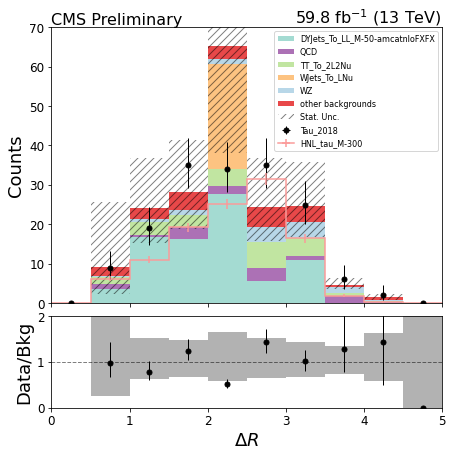

   
Showing  pt_tau1
Sum of QCD events in region A: 497.15
Sum of QCD events in region B: 88.82
QCD extrapolation factor from region (B/A): 0.18


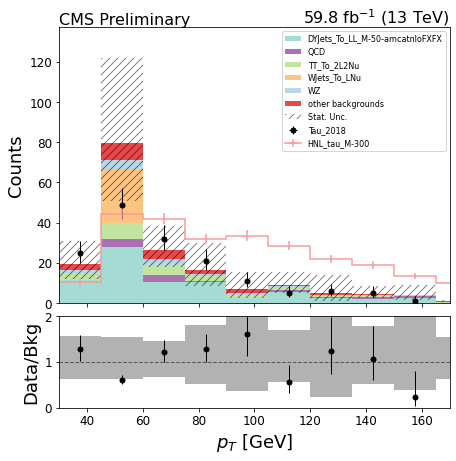

   
Showing  pt_tau2
Sum of QCD events in region A: 497.15
Sum of QCD events in region B: 88.82
QCD extrapolation factor from region (B/A): 0.18


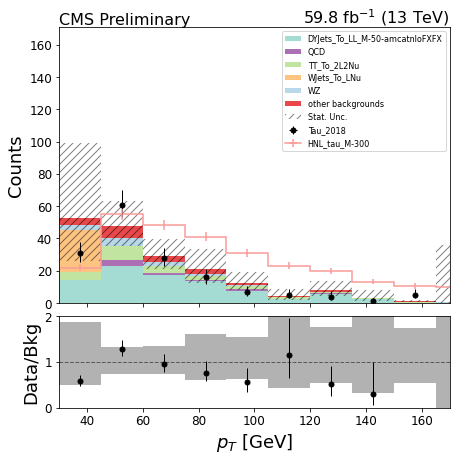

   
Showing  pt_e1
Sum of QCD events in region A: 497.15
Sum of QCD events in region B: 88.82
QCD extrapolation factor from region (B/A): 0.18


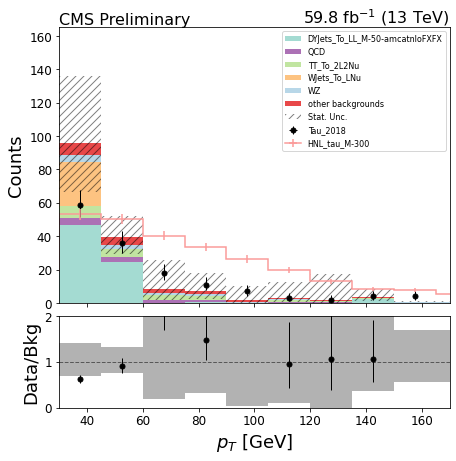

   
Showing  pt_sum_l1l2l3
Sum of QCD events in region A: 497.15
Sum of QCD events in region B: 88.82
QCD extrapolation factor from region (B/A): 0.18


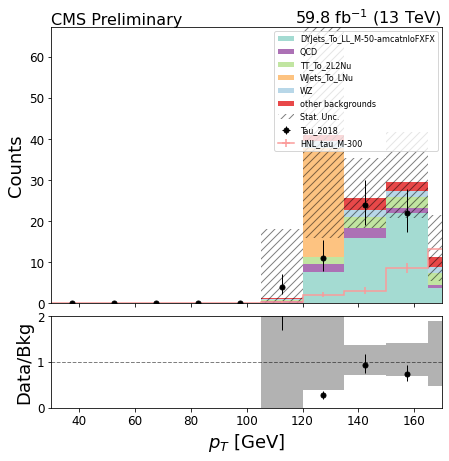

   
Showing  pt_sum_l1l2MET
Sum of QCD events in region A: 497.15
Sum of QCD events in region B: 88.82
QCD extrapolation factor from region (B/A): 0.18


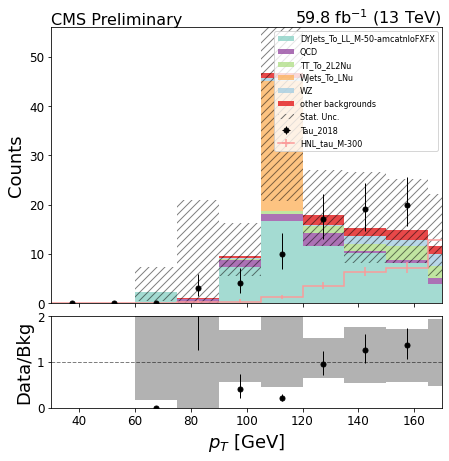

   
Showing  mT_tautau
Sum of QCD events in region A: 497.15
Sum of QCD events in region B: 88.82
QCD extrapolation factor from region (B/A): 0.18


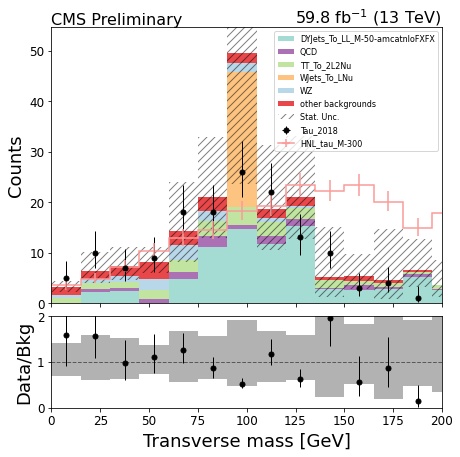

   
Showing  mT_l1MET
Sum of QCD events in region A: 497.15
Sum of QCD events in region B: 88.82
QCD extrapolation factor from region (B/A): 0.18


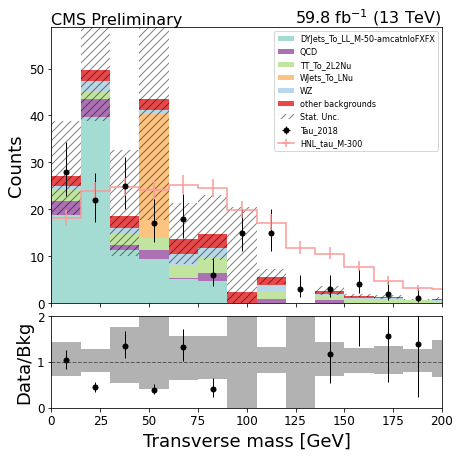

In [2]:
#plot data vs background for tte (QCD)

var_to_plot = [
        'dr_l1l2',
        'pt_tau1',
        'pt_tau2',
        'pt_e1',
        'pt_sum_l1l2l3',
        'pt_sum_l1l2MET',
        'mT_tautau',
        'mT_l1MET']

main_background = [
    'DYJets_To_LL_M-50-amcatnloFXFX',
    'TT_To_2L2Nu',
    'WZ',
    'WJets_To_LNu']

other_background = [
    'EWK_WMinus2Jets_W_To_LNu_M-50',
    'EWK_WPlus2Jets_W_To_LNu_M-50',
    'EWK_Z2Jets_Z_To_LL_M-50',
    'ST_t-channel_antitop_4f_InclusiveDecays',
    'ST_t-channel_top_4f_InclusiveDecays',
    'ST_tW_antitop_5f_inclusiveDecays',
    'ST_tW_top_5f_inclusiveDecays',
    'TT_To_Hadronic',
    'TT_To_SemiLeptonic',
    'TTWJets_To_LNu',
    'TTWW',
    'TTWZ',
    'TTZ_To_LLNuNu_M-10',
    'TTZZ',
    'ZZ',
    'WW',
    'WWW',
    'WWZ',
    'WZZ',
    'ZZZ']

for var in var_to_plot:
    try:
        if (len(result[var].values()) == 0):
            print(var, 'is empty')
            continue

        print('Showing ', var)

        #scaling 
        data_name='Tau_2018'
        lumi = lumi_Tau_2018

        scales = {s:plot_scale[s]*lumi*xsecs[s]/event_counter['sumw'][s] for s in scale_samples}

        result[var].scale(scales, axis='ds')
        result_regionA[var].scale(scales, axis='ds')
        result_regionB[var].scale(scales, axis='ds')
        result_regionC[var].scale(scales, axis='ds')

        # compute QCD background with ABCD method
        QCD_regionA = list(result_regionA[var][data_name].values().values())[0] - sum(list(result_regionA[var][main_background + other_background].values().values()))
        QCD_regionB = list(result_regionB[var][data_name].values().values())[0] - sum(list(result_regionB[var][main_background + other_background].values().values()))
        QCD_regionC = list(result_regionC[var][data_name].values().values())[0] - sum(list(result_regionC[var][main_background + other_background].values().values()))

        QCD_regionA[QCD_regionA < 0] = 0
        QCD_regionB[QCD_regionB < 0] = 0
        QCD_regionC[QCD_regionC < 0] = 0

        #compute scale factor TF = N(B) / N(A)
        step = (var_axis[var[0:2]][2] - var_axis[var[0:2]][1])/var_axis[var[0:2]][0]
        other_background_regionA = 0
        other_background_regionB = 0
        for background in (main_background + other_background):
            other_background_regionA = other_background_regionA + result_regionA['sumw_corrections'][background]*scales[background]
            other_background_regionB = other_background_regionB + result_regionB['sumw_corrections'][background]*scales[background]

        NA = result_regionA['sumw_corrections'][data_name] - other_background_regionA
        NB = result_regionB['sumw_corrections'][data_name] - other_background_regionB
        TF = NB/NA

        print("Sum of QCD events in region A: {:.2f}".format(NA))
        print("Sum of QCD events in region B: {:.2f}".format(NB))
        print("QCD extrapolation factor from region (B/A): {:.2f}".format(TF))
        #print("Number of events from region (B/A): {:.2f}".format(np.sum(list(result_regionB[var][data_name].values().values())[0])/np.sum(list(result_regionA[var][data_name].values().values())[0])))

        # QCD background estimation in signal region
        QCD_background = QCD_regionC*TF

        # make a nice ratio plot
        data_hist = result[var][data_name]

        BCK_histo = result[var][main_background]

        signal_histo = result[var][hnl]

        cumu_other_bck = np.zeros(var_axis[var[0:2]][0])
        for bck in other_background:
            if result[var][bck].values() == {}:
                pass
            else:
                cumu_other_bck = cumu_other_bck + list(result[var][bck].values().values())[0] #value at each bin

        # we create the histograms of all the other backgrounds + QCD with ABCD method
        if var[0:2] == 'pt':
            BCK_histo.fill(ds="other backgrounds", pt=np.arange(var_axis[var[0:2]][1], var_axis[var[0:2]][2], step), weight=cumu_other_bck)
            BCK_histo.fill(ds="QCD", pt=np.arange(var_axis[var[0:2]][1], var_axis[var[0:2]][2], step), weight=QCD_background)

            data_hist = data_hist.rebin("pt", hist.Bin("pt", r"$p_{T}$ [GeV]", 100, 0., 1500))
            BCK_histo = BCK_histo.rebin("pt", hist.Bin("pt", r"$p_{T}$ [GeV]", 100, 0., 1500))
            signal_histo = signal_histo.rebin("pt", hist.Bin("pt", r"$p_{T}$ [GeV]", 100, 0., 1500))

            #ratio_plot(data_hist,BCK_histo, 400, lumi, var, save_dir)
            ratio_plot_plus_signal(data_hist, BCK_histo, signal_histo, var, save_dir, xlim = [30,170.], ylim=1.8, luminosity = lumi, hnl_list = hnl)

        if var[0:2] == 'mT':
            BCK_histo.fill(ds="other backgrounds", mt=np.arange(var_axis[var[0:2]][1], var_axis[var[0:2]][2], step), weight=cumu_other_bck)
            BCK_histo.fill(ds="QCD", mt=np.arange(var_axis[var[0:2]][1], var_axis[var[0:2]][2], step), weight=QCD_background)

            data_hist = data_hist.rebin("mt", hist.Bin("mt", r"Transverse mass [GeV]", 100, 0., 1500.))
            BCK_histo = BCK_histo.rebin("mt", hist.Bin("mt", r"Transverse mass [GeV]", 100, 0., 1500.))
            signal_histo = signal_histo.rebin("mt", hist.Bin("mt", r"Transverse mass [GeV]", 100, 0., 1500.))

            ratio_plot_plus_signal(data_hist, BCK_histo, signal_histo, var, save_dir, xlim = [0,200.], ylim=1.1, luminosity = lumi, hnl_list = hnl)

        if var[0:2] == 'dr':
            BCK_histo.fill(ds="other backgrounds", dr=np.arange(var_axis[var[0:2]][1], var_axis[var[0:2]][2], step), weight=cumu_other_bck)
            BCK_histo.fill(ds="QCD", dr=np.arange(var_axis[var[0:2]][1], var_axis[var[0:2]][2], step), weight=QCD_background)

            data_hist = data_hist.rebin("dr", hist.Bin("dr", r"$\Delta R$", 10, 0., 5.))
            BCK_histo = BCK_histo.rebin("dr", hist.Bin("dr", r"$\Delta R$", 10, 0., 5.))
            signal_histo = signal_histo.rebin("dr", hist.Bin("dr", r"$\Delta R$", 10, 0., 5.))

            #ratio_plot(data_hist,BCK_histo, 5., lumi, var, save_dir)
            ratio_plot_plus_signal(data_hist, BCK_histo, signal_histo, var, save_dir, xlim = [0,5.], ylim=1., luminosity = lumi, hnl_list = hnl)

        print('   ')
        warnings.filterwarnings("default")
    except AssertionError:
        pass

Showing  dr_l1l2
Sum of QCD events in region A: 245.49
Sum of QCD events in region B: 7.06
QCD extrapolation factor from region (B/A): 0.03


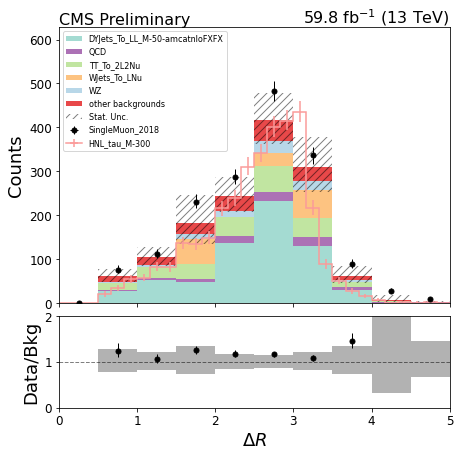

   
Showing  pt_tau1
Sum of QCD events in region A: 245.49
Sum of QCD events in region B: 7.06
QCD extrapolation factor from region (B/A): 0.03


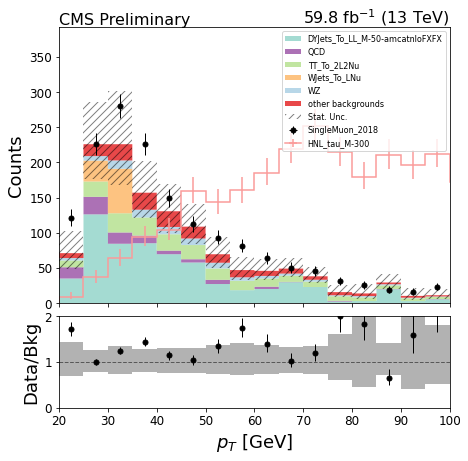

   
Showing  pt_tau2
Sum of QCD events in region A: 245.49
Sum of QCD events in region B: 7.06
QCD extrapolation factor from region (B/A): 0.03


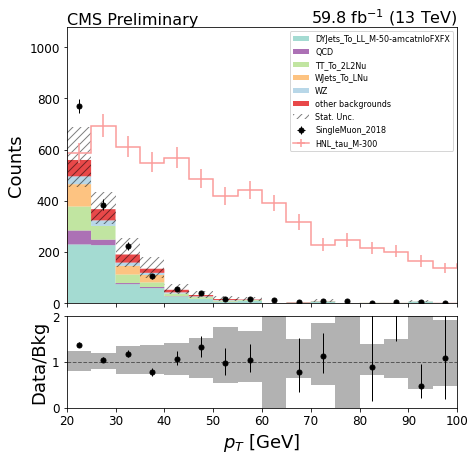

   
Showing  pt_mu1
Sum of QCD events in region A: 245.49
Sum of QCD events in region B: 7.06
QCD extrapolation factor from region (B/A): 0.03


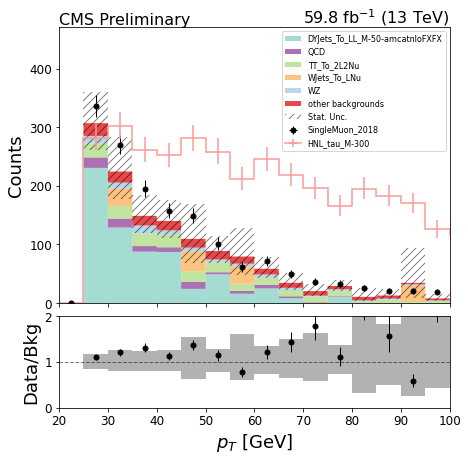

   
Showing  pt_sum_l1l2l3
Sum of QCD events in region A: 245.49
Sum of QCD events in region B: 7.06
QCD extrapolation factor from region (B/A): 0.03


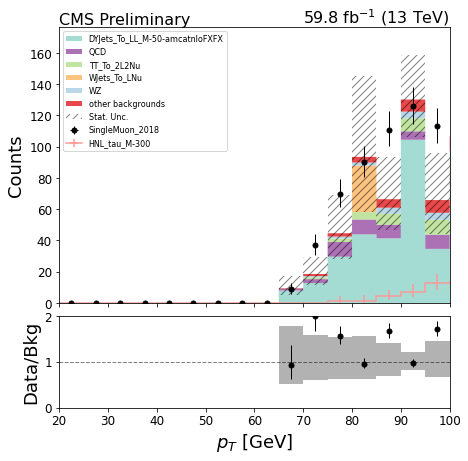

   
Showing  pt_sum_l1l2MET
Sum of QCD events in region A: 245.49
Sum of QCD events in region B: 7.06
QCD extrapolation factor from region (B/A): 0.03


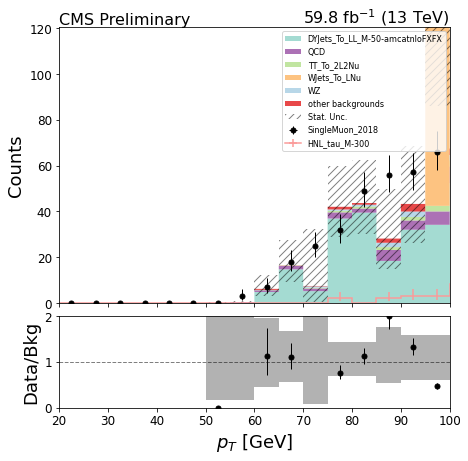

   
Showing  mT_tautau
Sum of QCD events in region A: 245.49
Sum of QCD events in region B: 7.06
QCD extrapolation factor from region (B/A): 0.03


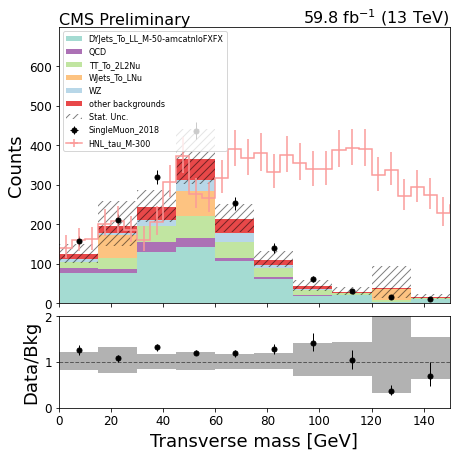

   
Showing  mT_l1MET
Sum of QCD events in region A: 245.49
Sum of QCD events in region B: 7.06
QCD extrapolation factor from region (B/A): 0.03


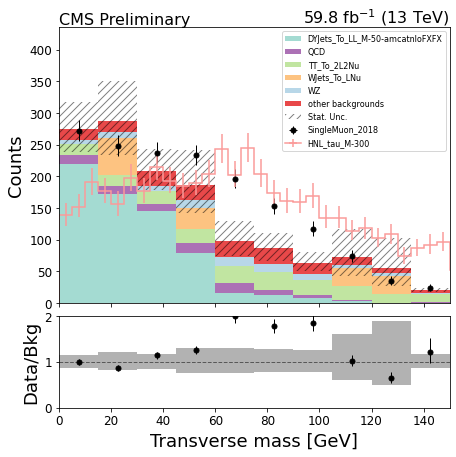

In [4]:
#plot data vs background for ttm (QCD)

var_to_plot = [
        'dr_l1l2',
        'pt_tau1',
        'pt_tau2',
        'pt_mu1',
        'pt_sum_l1l2l3',
        'pt_sum_l1l2MET',
        'mT_tautau',
        'mT_l1MET']

main_background = [
    'DYJets_To_LL_M-50-amcatnloFXFX',
    'TT_To_2L2Nu',
    'WZ',
    'WJets_To_LNu']

other_background = [
    'EWK_WMinus2Jets_W_To_LNu_M-50',
    'EWK_WPlus2Jets_W_To_LNu_M-50',
    'EWK_Z2Jets_Z_To_LL_M-50',
    'ST_t-channel_antitop_4f_InclusiveDecays',
    'ST_t-channel_top_4f_InclusiveDecays',
    'ST_tW_antitop_5f_inclusiveDecays',
    'ST_tW_top_5f_inclusiveDecays',
    'TT_To_Hadronic',
    'TT_To_SemiLeptonic',
    'TTWJets_To_LNu',
    'TTWW',
    'TTWZ',
    'TTZ_To_LLNuNu_M-10',
    'TTZZ',
    'ZZ',
    'WW',
    'WWW',
    'WWZ',
    'WZZ',
    'ZZZ']

for var in var_to_plot:
    try:
        if (len(result[var].values()) == 0):
            print(var, 'is empty')
            continue

        print('Showing ', var)

        #scaling 
        data_name='SingleMuon_2018'
        lumi = lumi_SingleMuon_2018

        scales = {s:plot_scale[s]*lumi*xsecs[s]/event_counter['sumw'][s] for s in scale_samples}

        result[var].scale(scales, axis='ds')
        result_regionA[var].scale(scales, axis='ds')
        result_regionB[var].scale(scales, axis='ds')
        result_regionC[var].scale(scales, axis='ds')

        # compute QCD background with ABCD method
        QCD_regionA = list(result_regionA[var][data_name].values().values())[0] - sum(list(result_regionA[var][main_background + other_background].values().values()))
        QCD_regionB = list(result_regionB[var][data_name].values().values())[0] - sum(list(result_regionB[var][main_background + other_background].values().values()))
        QCD_regionC = list(result_regionC[var][data_name].values().values())[0] - sum(list(result_regionC[var][main_background + other_background].values().values()))

        QCD_regionA[QCD_regionA < 0] = 0
        QCD_regionB[QCD_regionB < 0] = 0
        QCD_regionC[QCD_regionC < 0] = 0

        #compute scale factor TF = N(B) / N(A)
        step = (var_axis[var[0:2]][2] - var_axis[var[0:2]][1])/var_axis[var[0:2]][0]
        other_background_regionA = 0
        other_background_regionB = 0
        for background in (main_background + other_background):
            other_background_regionA = other_background_regionA + result_regionA['sumw_corrections'][background]*scales[background]
            other_background_regionB = other_background_regionB + result_regionB['sumw_corrections'][background]*scales[background]

        NA = result_regionA['sumw_corrections'][data_name] - other_background_regionA
        NB = result_regionB['sumw_corrections'][data_name] - other_background_regionB
        TF = NB/NA

        print("Sum of QCD events in region A: {:.2f}".format(NA))
        print("Sum of QCD events in region B: {:.2f}".format(NB))
        print("QCD extrapolation factor from region (B/A): {:.2f}".format(TF))
        
        # QCD background estimation in signal region
        QCD_background = QCD_regionC*TF

        # make a nice ratio plot
        data_hist = result[var][data_name]

        BCK_histo = result[var][main_background]

        signal_histo = result[var][hnl]

        cumu_other_bck = np.zeros(var_axis[var[0:2]][0])
        for bck in other_background:
            if result[var][bck].values() == {}:
                pass
            else:
                cumu_other_bck = cumu_other_bck + list(result[var][bck].values().values())[0] #value at each bin

        # we create the histograms of all the other backgrounds + QCD with ABCD method
        if var[0:2] == 'pt':
            BCK_histo.fill(ds="other backgrounds", pt=np.arange(var_axis[var[0:2]][1], var_axis[var[0:2]][2], step), weight=cumu_other_bck)
            BCK_histo.fill(ds="QCD", pt=np.arange(var_axis[var[0:2]][1], var_axis[var[0:2]][2], step), weight=QCD_background)

            data_hist = data_hist.rebin("pt", hist.Bin("pt", r"$p_{T}$ [GeV]", 300, 0., 1500))
            BCK_histo = BCK_histo.rebin("pt", hist.Bin("pt", r"$p_{T}$ [GeV]", 300, 0., 1500))

            ratio_plot_plus_signal(data_hist, BCK_histo, signal_histo, var, save_dir, xlim = [20,100.], ylim=0.4, luminosity = lumi, hnl_list = hnl)

        if var[0:2] == 'mT':
            BCK_histo.fill(ds="other backgrounds", mt=np.arange(var_axis[var[0:2]][1], var_axis[var[0:2]][2], step), weight=cumu_other_bck)
            BCK_histo.fill(ds="QCD", mt=np.arange(var_axis[var[0:2]][1], var_axis[var[0:2]][2], step), weight=QCD_background)

            data_hist = data_hist.rebin("mt", hist.Bin("mt", r"Transverse mass [GeV]", 100, 0., 1500.))
            BCK_histo = BCK_histo.rebin("mt", hist.Bin("mt", r"Transverse mass [GeV]", 100, 0., 1500.))

            ratio_plot_plus_signal(data_hist, BCK_histo, signal_histo, var, save_dir, xlim = [0,150.], ylim=0.6, luminosity = lumi, hnl_list = hnl)

        if var[0:2] == 'dr':
            BCK_histo.fill(ds="other backgrounds", dr=np.arange(var_axis[var[0:2]][1], var_axis[var[0:2]][2], step), weight=cumu_other_bck)
            BCK_histo.fill(ds="QCD", dr=np.arange(var_axis[var[0:2]][1], var_axis[var[0:2]][2], step), weight=QCD_background)

            data_hist = data_hist.rebin("dr", hist.Bin("dr", r"$\Delta R$", 10, 0., 5.))
            BCK_histo = BCK_histo.rebin("dr", hist.Bin("dr", r"$\Delta R$", 10, 0., 5.))

            ratio_plot_plus_signal(data_hist, BCK_histo, signal_histo, var, save_dir, xlim = [0,5.], ylim=0.3, luminosity = lumi, hnl_list = hnl)

        print('   ')
        warnings.filterwarnings("default")
    except AssertionError:
        pass


For channel tmm
Showing  dr_l1l2
Sum of QCD events in region A: 19.93
Sum of QCD events in region B: 3.36
QCD extrapolation factor from region (B/A): 0.17


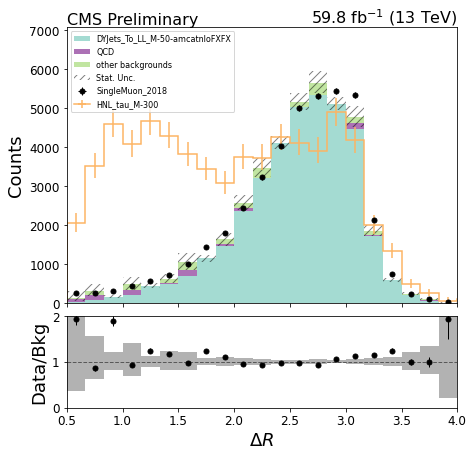

   
Showing  pt_mu1
Sum of QCD events in region A: 19.93
Sum of QCD events in region B: 3.36
QCD extrapolation factor from region (B/A): 0.17


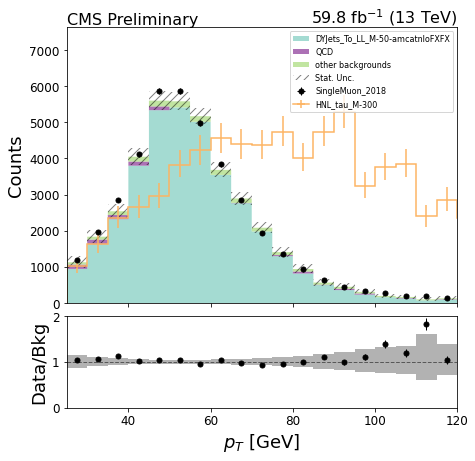

   
Showing  pt_mu2
Sum of QCD events in region A: 19.93
Sum of QCD events in region B: 3.36
QCD extrapolation factor from region (B/A): 0.17


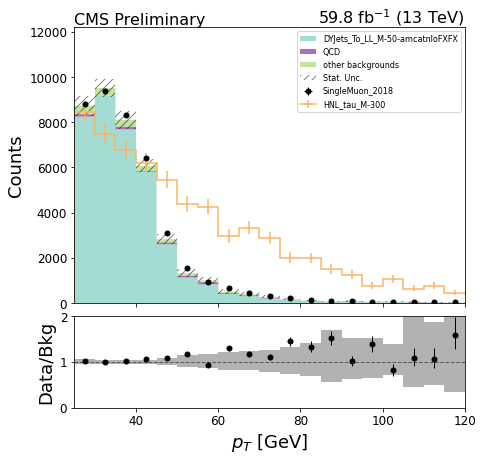

   
Showing  pt_tau1
Sum of QCD events in region A: 19.93
Sum of QCD events in region B: 3.36
QCD extrapolation factor from region (B/A): 0.17


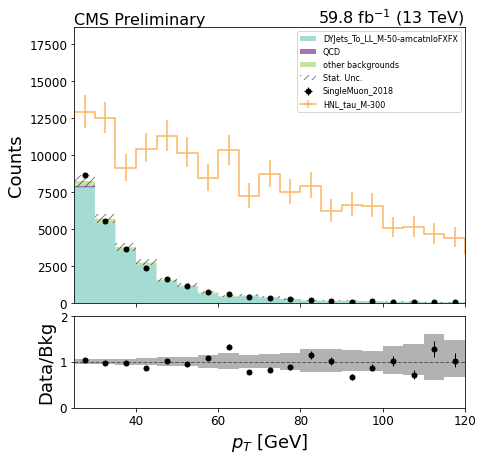

   
Showing  comb_mass_l1l2
Sum of QCD events in region A: 19.93
Sum of QCD events in region B: 3.36
QCD extrapolation factor from region (B/A): 0.17


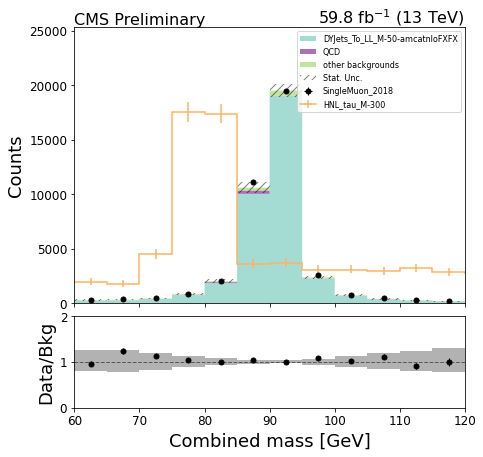

   
Showing  met
Sum of QCD events in region A: 19.93
Sum of QCD events in region B: 3.36
QCD extrapolation factor from region (B/A): 0.17


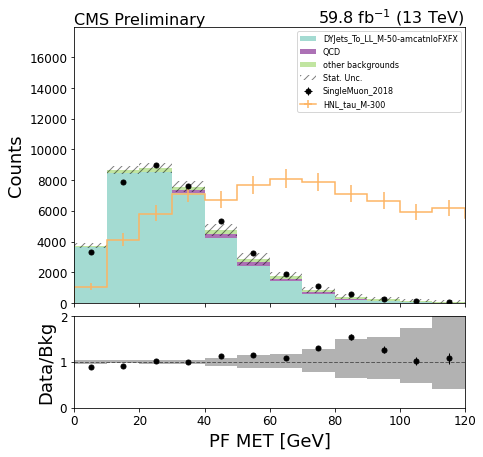

In [2]:
#plot data vs background tmm
var_to_plot = [
        'dr_l1l2',
        'pt_mu1',
        'pt_mu2',
        'pt_tau1',
        'comb_mass_l1l2',
        'met']

main_background = [
    'DYJets_To_LL_M-50-amcatnloFXFX']

other_background = [
    'EWK_WMinus2Jets_W_To_LNu_M-50',
    'EWK_WPlus2Jets_W_To_LNu_M-50',
    'EWK_Z2Jets_Z_To_LL_M-50',
    'ST_t-channel_antitop_4f_InclusiveDecays',
    'ST_t-channel_top_4f_InclusiveDecays',
    'ST_tW_antitop_5f_inclusiveDecays',
    'ST_tW_top_5f_inclusiveDecays',
    'TT_To_Hadronic',
    'TT_To_SemiLeptonic',
    'TTWJets_To_LNu',
    'TTWW',
    'TTWZ',
    'TTZ_To_LLNuNu_M-10',
    'TTZZ',
    'WZ',
    'ZZ',
    'WWW',
    'WWZ',
    'WZZ',
    'ZZZ',
    'TT_To_2L2Nu',
    'WJets_To_LNu',
    'WW']

print('For channel '+str(channel))

for var in var_to_plot:
    try:
        if (len(result[var].values()) == 0):
            print(var, 'is empty')
            continue

        print('Showing ', var)

        #scaling 
        data_name='SingleMuon_2018'
        lumi = lumi_SingleMuon_2018

        scales = {s:plot_scale[s]*lumi*xsecs[s]/event_counter['sumw'][s] for s in scale_samples}

        result[var].scale(scales, axis='ds')
        result_regionA[var].scale(scales, axis='ds')
        result_regionB[var].scale(scales, axis='ds')
        result_regionC[var].scale(scales, axis='ds')

        # compute QCD background with ABCD method
        QCD_regionA = list(result_regionA[var][data_name].values().values())[0] - sum(list(result_regionA[var][main_background + other_background].values().values()))
        QCD_regionB = list(result_regionB[var][data_name].values().values())[0] - sum(list(result_regionB[var][main_background + other_background].values().values()))
        QCD_regionC = list(result_regionC[var][data_name].values().values())[0] - sum(list(result_regionC[var][main_background + other_background].values().values()))

        QCD_regionA[QCD_regionA < 0] = 0
        QCD_regionB[QCD_regionB < 0] = 0
        QCD_regionC[QCD_regionC < 0] = 0

        #compute scale factor TF = N(B) / N(A)
        step = (var_axis[var[0:2]][2] - var_axis[var[0:2]][1])/var_axis[var[0:2]][0]
        other_background_regionA = 0
        other_background_regionB = 0
        for background in (main_background + other_background):
            other_background_regionA = other_background_regionA + result_regionA['sumw_l3sel'][background]*scales[background]
            other_background_regionB = other_background_regionB + result_regionB['sumw_l3sel'][background]*scales[background]

        NA = result_regionA['sumw_l3sel'][data_name] - other_background_regionA
        NB = result_regionB['sumw_l3sel'][data_name] - other_background_regionB
        TF = NB/NA

        print("Sum of QCD events in region A: {:.2f}".format(NA))
        print("Sum of QCD events in region B: {:.2f}".format(NB))
        print("QCD extrapolation factor from region (B/A): {:.2f}".format(TF))
        
        # QCD background estimation in signal region
        QCD_background = QCD_regionC*TF

        # make a nice ratio plot
        data_hist = result[var][data_name]

        BCK_histo = result[var][main_background]

        signal_histo = result[var][hnl]

        cumu_other_bck = np.zeros(var_axis[var[0:2]][0])
        for bck in other_background:
            if result[var][bck].values() == {}:
                pass
            else:
                cumu_other_bck = cumu_other_bck + list(result[var][bck].values().values())[0] #value at each bin

        step = (var_axis[var[0:2]][2] - var_axis[var[0:2]][1])/var_axis[var[0:2]][0]

        # we create the histograms of all the other backgrounds + QCD with ABCD method
        if var[0:2] == 'pt':
            BCK_histo.fill(ds="other backgrounds", pt=np.arange(var_axis[var[0:2]][1], var_axis[var[0:2]][2], step), weight=cumu_other_bck)
            BCK_histo.fill(ds="QCD", pt=np.arange(var_axis[var[0:2]][1], var_axis[var[0:2]][2], step), weight=QCD_background)

            ratio_plot_plus_signal(data_hist, BCK_histo, signal_histo, var, save_dir, xlim = [25,120], ylim = 0.3, luminosity = lumi, hnl_list = hnl)

        if var[0:2] == 'mT':
            BCK_histo.fill(ds="other backgrounds", mt=np.arange(var_axis[var[0:2]][1], var_axis[var[0:2]][2], step), weight=cumu_other_bck)
            BCK_histo.fill(ds="QCD", mt=np.arange(var_axis[var[0:2]][1], var_axis[var[0:2]][2], step), weight=QCD_background)

            ratio_plot_plus_signal(data_hist, BCK_histo, signal_histo, var, save_dir, xlim = [0,300], ylim = 1., luminosity = lumi, hnl_list = hnl)

        if var[0:2] == 'dr':
            BCK_histo.fill(ds="other backgrounds", dr=np.arange(var_axis[var[0:2]][1], var_axis[var[0:2]][2], step), weight=cumu_other_bck)
            BCK_histo.fill(ds="QCD", dr=np.arange(var_axis[var[0:2]][1], var_axis[var[0:2]][2], step), weight=QCD_background)

            ratio_plot_plus_signal(data_hist, BCK_histo, signal_histo, var, save_dir, xlim = [0.5,4.], ylim = 0.3, luminosity = lumi, hnl_list = hnl)

        if var[0:2] == 'co':
            BCK_histo.fill(ds="other backgrounds", mc=np.arange(var_axis['mc'][1], var_axis['mc'][2], step), weight=cumu_other_bck)
            BCK_histo.fill(ds="QCD", mc=np.arange(var_axis['mc'][1], var_axis['mc'][2], step), weight=QCD_background)

            ratio_plot_plus_signal(data_hist, BCK_histo, signal_histo, var, save_dir, xlim = [60,120], ylim = 0.3, luminosity = lumi, hnl_list = hnl)

        if var[0:2] == 'me':
            BCK_histo.fill(ds="other backgrounds", met=np.arange(var_axis[var[0:2]][1], var_axis[var[0:2]][2], step), weight=cumu_other_bck)
            BCK_histo.fill(ds="QCD", met=np.arange(var_axis[var[0:2]][1], var_axis[var[0:2]][2], step), weight=QCD_background)

            ratio_plot_plus_signal(data_hist, BCK_histo, signal_histo, var, save_dir, xlim = [0,120], ylim = 1., luminosity = lumi, hnl_list = hnl)

        print('   ')
        warnings.filterwarnings("default")
    except AssertionError:
        pass


For channel tee
Showing  dr_l1l2
Sum of QCD events in region A: 568.40
Sum of QCD events in region B: 184.66
QCD extrapolation factor from region (B/A): 0.32


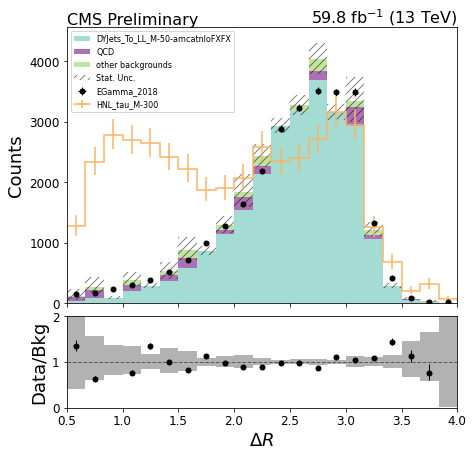

   
Showing  pt_e1
Sum of QCD events in region A: 568.40
Sum of QCD events in region B: 184.66
QCD extrapolation factor from region (B/A): 0.32


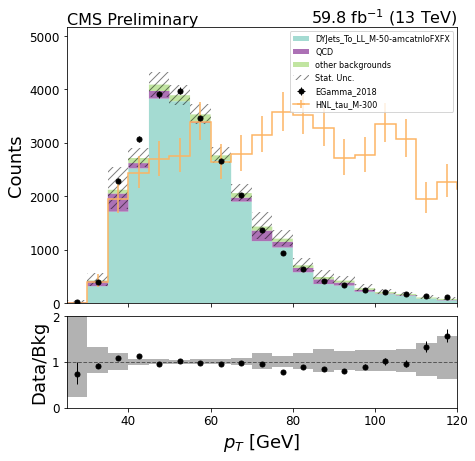

   
Showing  pt_e2
Sum of QCD events in region A: 568.40
Sum of QCD events in region B: 184.66
QCD extrapolation factor from region (B/A): 0.32


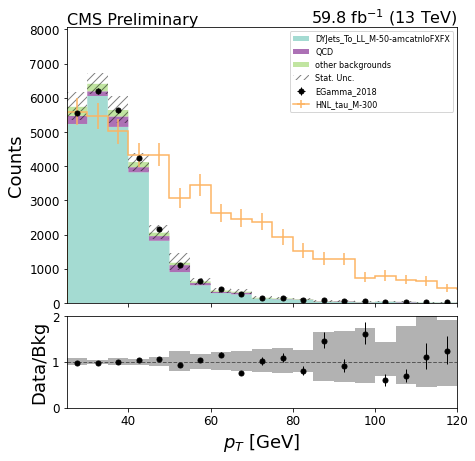

   
Showing  pt_tau1
Sum of QCD events in region A: 568.40
Sum of QCD events in region B: 184.66
QCD extrapolation factor from region (B/A): 0.32


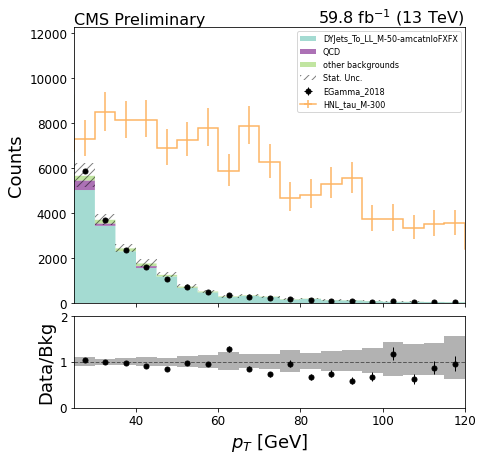

   
Showing  comb_mass_l1l2
Sum of QCD events in region A: 568.40
Sum of QCD events in region B: 184.66
QCD extrapolation factor from region (B/A): 0.32


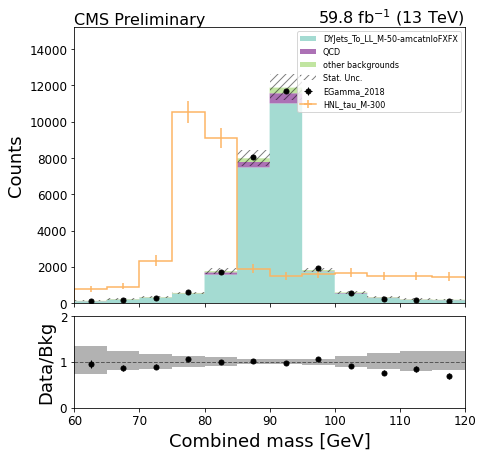

   
Showing  met
Sum of QCD events in region A: 568.40
Sum of QCD events in region B: 184.66
QCD extrapolation factor from region (B/A): 0.32


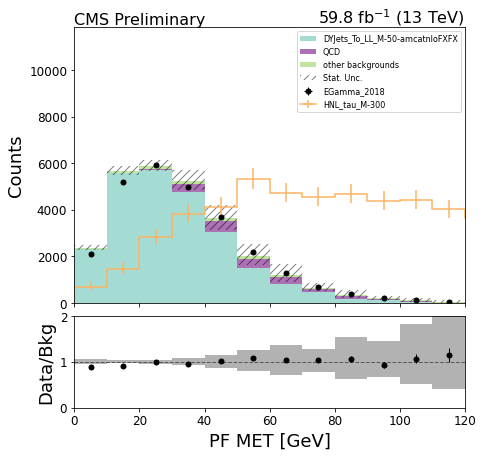

In [2]:
#plot data vs background tee
var_to_plot = [
        'dr_l1l2',
        'pt_e1',
        'pt_e2',
        'pt_tau1',
        'comb_mass_l1l2',
        'met']

main_background = [
    'DYJets_To_LL_M-50-amcatnloFXFX']

other_background = [
    'EWK_WMinus2Jets_W_To_LNu_M-50',
    'EWK_WPlus2Jets_W_To_LNu_M-50',
    'EWK_Z2Jets_Z_To_LL_M-50',
    'ST_t-channel_antitop_4f_InclusiveDecays',
    'ST_t-channel_top_4f_InclusiveDecays',
    'ST_tW_antitop_5f_inclusiveDecays',
    'ST_tW_top_5f_inclusiveDecays',
    'TT_To_Hadronic',
    'TT_To_SemiLeptonic',
    'TTWJets_To_LNu',
    'TTWW',
    'TTWZ',
    'TTZ_To_LLNuNu_M-10',
    'TTZZ',
    'WZ',
    'ZZ',
    'WWW',
    'WWZ',
    'WZZ',
    'ZZZ',
    'TT_To_2L2Nu',
    'WJets_To_LNu',
    'WW']

print('For channel '+str(channel))

for var in var_to_plot:
    try:
        if (len(result[var].values()) == 0):
            print(var, 'is empty')
            continue

        print('Showing ', var)

        #scaling 
        data_name= 'EGamma_2018'
        lumi = lumi_EGamma_2018

        scales = {s:plot_scale[s]*lumi*xsecs[s]/event_counter['sumw'][s] for s in scale_samples}

        result[var].scale(scales, axis='ds')
        result_regionA[var].scale(scales, axis='ds')
        result_regionB[var].scale(scales, axis='ds')
        result_regionC[var].scale(scales, axis='ds')

        # compute QCD background with ABCD method
        QCD_regionA = list(result_regionA[var][data_name].values().values())[0] - sum(list(result_regionA[var][main_background + other_background].values().values()))
        QCD_regionB = list(result_regionB[var][data_name].values().values())[0] - sum(list(result_regionB[var][main_background + other_background].values().values()))
        QCD_regionC = list(result_regionC[var][data_name].values().values())[0] - sum(list(result_regionC[var][main_background + other_background].values().values()))

        QCD_regionA[QCD_regionA < 0] = 0
        QCD_regionB[QCD_regionB < 0] = 0
        QCD_regionC[QCD_regionC < 0] = 0

        #compute scale factor TF = N(B) / N(A)
        step = (var_axis[var[0:2]][2] - var_axis[var[0:2]][1])/var_axis[var[0:2]][0]
        other_background_regionA = 0
        other_background_regionB = 0
        for background in (main_background + other_background):
            other_background_regionA = other_background_regionA + result_regionA['sumw_l3sel'][background]*scales[background]
            other_background_regionB = other_background_regionB + result_regionB['sumw_l3sel'][background]*scales[background]

        NA = result_regionA['sumw_l3sel'][data_name] - other_background_regionA
        NB = result_regionB['sumw_l3sel'][data_name] - other_background_regionB
        TF = NB/NA

        print("Sum of QCD events in region A: {:.2f}".format(NA))
        print("Sum of QCD events in region B: {:.2f}".format(NB))
        print("QCD extrapolation factor from region (B/A): {:.2f}".format(TF))
        
        # QCD background estimation in signal region
        QCD_background = QCD_regionC*TF
        
        # make a nice ratio plot
        data_hist = result[var][data_name]

        BCK_histo = result[var][main_background]

        signal_histo = result[var][hnl]

        cumu_other_bck = np.zeros(var_axis[var[0:2]][0])
        for bck in other_background:
            if result[var][bck].values() == {}:
                pass
            else:
                cumu_other_bck = cumu_other_bck + list(result[var][bck].values().values())[0] #value at each bin

        step = (var_axis[var[0:2]][2] - var_axis[var[0:2]][1])/var_axis[var[0:2]][0]

        # we create the histograms of all the other backgrounds + QCD with ABCD method
        if var[0:2] == 'pt':
            BCK_histo.fill(ds="other backgrounds", pt=np.arange(var_axis[var[0:2]][1], var_axis[var[0:2]][2], step), weight=cumu_other_bck)
            BCK_histo.fill(ds="QCD", pt=np.arange(var_axis[var[0:2]][1], var_axis[var[0:2]][2], step), weight=QCD_background)

            ratio_plot_plus_signal(data_hist, BCK_histo, signal_histo, var, save_dir, xlim = [25,120], ylim = 0.3, luminosity = lumi, hnl_list = hnl)

        if var[0:2] == 'mT':
            BCK_histo.fill(ds="other backgrounds", mt=np.arange(var_axis[var[0:2]][1], var_axis[var[0:2]][2], step), weight=cumu_other_bck)
            BCK_histo.fill(ds="QCD", mt=np.arange(var_axis[var[0:2]][1], var_axis[var[0:2]][2], step), weight=QCD_background)

            ratio_plot_plus_signal(data_hist, BCK_histo, signal_histo, var, save_dir, xlim = [0,300], ylim = 1., luminosity = lumi, hnl_list = hnl)

        if var[0:2] == 'dr':
            BCK_histo.fill(ds="other backgrounds", dr=np.arange(var_axis[var[0:2]][1], var_axis[var[0:2]][2], step), weight=cumu_other_bck)
            BCK_histo.fill(ds="QCD", dr=np.arange(var_axis[var[0:2]][1], var_axis[var[0:2]][2], step), weight=QCD_background)

            ratio_plot_plus_signal(data_hist, BCK_histo, signal_histo, var, save_dir, xlim = [0.5,4.], ylim = 0.3, luminosity = lumi, hnl_list = hnl)

        if var[0:2] == 'co':
            BCK_histo.fill(ds="other backgrounds", mc=np.arange(var_axis['mc'][1], var_axis['mc'][2], step), weight=cumu_other_bck)
            BCK_histo.fill(ds="QCD", mc=np.arange(var_axis['mc'][1], var_axis['mc'][2], step), weight=QCD_background)

            ratio_plot_plus_signal(data_hist, BCK_histo, signal_histo, var, save_dir, xlim = [60,120], ylim = 0.3, luminosity = lumi, hnl_list = hnl)

        if var[0:2] == 'me':
            BCK_histo.fill(ds="other backgrounds", met=np.arange(var_axis[var[0:2]][1], var_axis[var[0:2]][2], step), weight=cumu_other_bck)
            BCK_histo.fill(ds="QCD", met=np.arange(var_axis[var[0:2]][1], var_axis[var[0:2]][2], step), weight=QCD_background)

            ratio_plot_plus_signal(data_hist, BCK_histo, signal_histo, var, save_dir, xlim = [0,120], ylim = 1., luminosity = lumi, hnl_list = hnl)

        print('   ')
        warnings.filterwarnings("default")
    except AssertionError:
        pass


For channel tem_OS
Showing  dr_l1l2
Sum of QCD events in region A: 17.77
Sum of QCD events in region B: 0.31
QCD extrapolation factor from region (B/A): 0.02


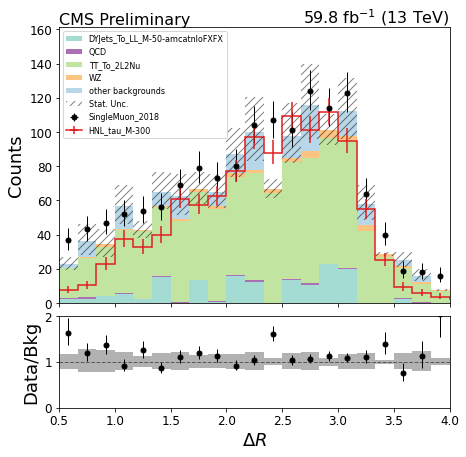

   
Showing  pt_e1
Sum of QCD events in region A: 17.77
Sum of QCD events in region B: 0.31
QCD extrapolation factor from region (B/A): 0.02


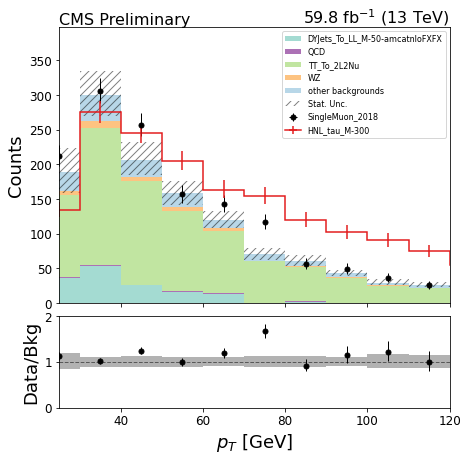

   
Showing  pt_mu1
Sum of QCD events in region A: 17.77
Sum of QCD events in region B: 0.31
QCD extrapolation factor from region (B/A): 0.02


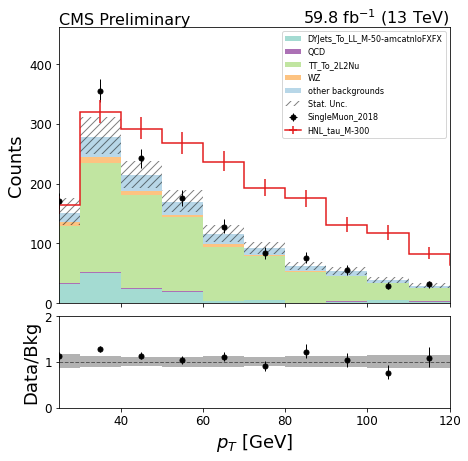

   
Showing  pt_tau1
Sum of QCD events in region A: 17.77
Sum of QCD events in region B: 0.31
QCD extrapolation factor from region (B/A): 0.02


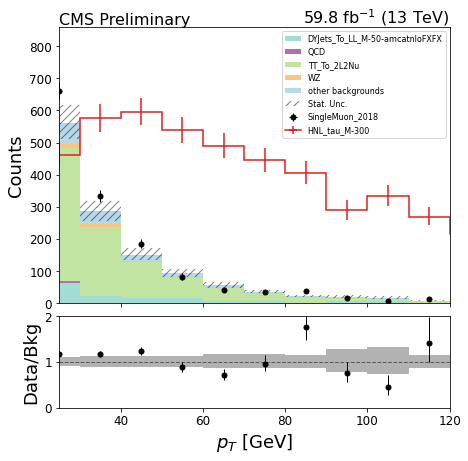

   
Showing  comb_mass_l1l2
Sum of QCD events in region A: 17.77
Sum of QCD events in region B: 0.31
QCD extrapolation factor from region (B/A): 0.02


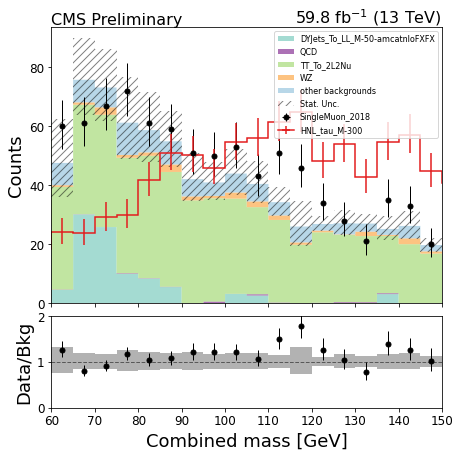

   
Showing  met
Sum of QCD events in region A: 17.77
Sum of QCD events in region B: 0.31
QCD extrapolation factor from region (B/A): 0.02


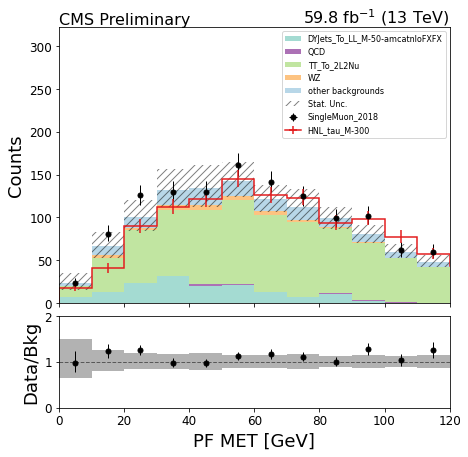

In [2]:
#plot data vs background tem_OS
var_to_plot = [
        'dr_l1l2',
        'pt_e1',
        'pt_mu1',
        'pt_tau1',
        'comb_mass_l1l2',
        'met']

main_background = [
    'DYJets_To_LL_M-50-amcatnloFXFX',
    'TT_To_2L2Nu',
    'WZ']

other_background = [
    'EWK_WMinus2Jets_W_To_LNu_M-50',
    'EWK_WPlus2Jets_W_To_LNu_M-50',
    'EWK_Z2Jets_Z_To_LL_M-50',
    'ST_t-channel_antitop_4f_InclusiveDecays',
    'ST_t-channel_top_4f_InclusiveDecays',
    'ST_tW_antitop_5f_inclusiveDecays',
    'ST_tW_top_5f_inclusiveDecays',
    'TT_To_Hadronic',
    'TT_To_SemiLeptonic',
    'TTWJets_To_LNu',
    'TTWW',
    'TTWZ',
    'TTZ_To_LLNuNu_M-10',
    'WJets_To_LNu',
    'TTZZ',
    'ZZ',
    'WW',
    'WWW',
    'WWZ',
    'WZZ',
    'ZZZ']

print('For channel '+str(channel))

for var in var_to_plot:
    try:
        if (len(result[var].values()) == 0):
            print(var, 'is empty')
            continue

        print('Showing ', var)

        #scaling 
        data_name='SingleMuon_2018'
        lumi = lumi_SingleMuon_2018

        scales = {s:plot_scale[s]*lumi*xsecs[s]/event_counter['sumw'][s] for s in scale_samples}

        result[var].scale(scales, axis='ds')
        result_regionA[var].scale(scales, axis='ds')
        result_regionB[var].scale(scales, axis='ds')
        result_regionC[var].scale(scales, axis='ds')

        # compute QCD background with ABCD method
        QCD_regionA = list(result_regionA[var][data_name].values().values())[0] - sum(list(result_regionA[var][main_background + other_background].values().values()))
        QCD_regionB = list(result_regionB[var][data_name].values().values())[0] - sum(list(result_regionB[var][main_background + other_background].values().values()))
        QCD_regionC = list(result_regionC[var][data_name].values().values())[0] - sum(list(result_regionC[var][main_background + other_background].values().values()))

        QCD_regionA[QCD_regionA < 0] = 0
        QCD_regionB[QCD_regionB < 0] = 0
        QCD_regionC[QCD_regionC < 0] = 0

        #compute scale factor TF = N(B) / N(A)
        step = (var_axis[var[0:2]][2] - var_axis[var[0:2]][1])/var_axis[var[0:2]][0]
        other_background_regionA = 0
        other_background_regionB = 0
        for background in (main_background + other_background):
            other_background_regionA = other_background_regionA + result_regionA['sumw_l3sel'][background]*scales[background]
            other_background_regionB = other_background_regionB + result_regionB['sumw_l3sel'][background]*scales[background]

        NA = result_regionA['sumw_l3sel'][data_name] - other_background_regionA
        NB = result_regionB['sumw_l3sel'][data_name] - other_background_regionB
        TF = NB/NA

        print("Sum of QCD events in region A: {:.2f}".format(NA))
        print("Sum of QCD events in region B: {:.2f}".format(NB))
        print("QCD extrapolation factor from region (B/A): {:.2f}".format(TF))
        
        # QCD background estimation in signal region
        QCD_background = QCD_regionC*TF
        
        # make a nice ratio plot
        data_hist = result[var][data_name]

        BCK_histo = result[var][main_background]

        signal_histo = result[var][hnl]

        cumu_other_bck = np.zeros(var_axis[var[0:2]][0])
        for bck in other_background:
            if result[var][bck].values() == {}:
                pass
            else:
                cumu_other_bck = cumu_other_bck + list(result[var][bck].values().values())[0] #value at each bin

        step = (var_axis[var[0:2]][2] - var_axis[var[0:2]][1])/var_axis[var[0:2]][0]

        # we create the histograms of all the other backgrounds + QCD with ABCD method
        if var[0:2] == 'pt':
            BCK_histo.fill(ds="other backgrounds", pt=np.arange(var_axis[var[0:2]][1], var_axis[var[0:2]][2], step), weight=cumu_other_bck)
            BCK_histo.fill(ds="QCD", pt=np.arange(var_axis[var[0:2]][1], var_axis[var[0:2]][2], step), weight=QCD_background)
    
            data_hist = data_hist.rebin("pt", hist.Bin("pt", r"$p_{T}$ [GeV]", 150, 0., 1500))
            BCK_histo = BCK_histo.rebin("pt", hist.Bin("pt", r"$p_{T}$ [GeV]", 150, 0., 1500))
            signal_histo = signal_histo.rebin("pt", hist.Bin("pt", r"$p_{T}$ [GeV]", 150, 0., 1500))

            ratio_plot_plus_signal(data_hist, BCK_histo, signal_histo, var, save_dir, xlim = [25,120], ylim = 0.3, luminosity = lumi, hnl_list = hnl)

        if var[0:2] == 'mT':
            BCK_histo.fill(ds="other backgrounds", mt=np.arange(var_axis[var[0:2]][1], var_axis[var[0:2]][2], step), weight=cumu_other_bck)
            BCK_histo.fill(ds="QCD", mt=np.arange(var_axis[var[0:2]][1], var_axis[var[0:2]][2], step), weight=QCD_background)

            ratio_plot_plus_signal(data_hist, BCK_histo, signal_histo, var, save_dir, xlim = [0,300], ylim = 1., luminosity = lumi, hnl_list = hnl)

        if var[0:2] == 'dr':
            BCK_histo.fill(ds="other backgrounds", dr=np.arange(var_axis[var[0:2]][1], var_axis[var[0:2]][2], step), weight=cumu_other_bck)
            BCK_histo.fill(ds="QCD", dr=np.arange(var_axis[var[0:2]][1], var_axis[var[0:2]][2], step), weight=QCD_background)

            ratio_plot_plus_signal(data_hist, BCK_histo, signal_histo, var, save_dir, xlim = [0.5,4.], ylim = 0.3, luminosity = lumi, hnl_list = hnl)

        if var[0:2] == 'co':
            BCK_histo.fill(ds="other backgrounds", mc=np.arange(var_axis['mc'][1], var_axis['mc'][2], step), weight=cumu_other_bck)
            BCK_histo.fill(ds="QCD", mc=np.arange(var_axis['mc'][1], var_axis['mc'][2], step), weight=QCD_background)

            ratio_plot_plus_signal(data_hist, BCK_histo, signal_histo, var, save_dir, xlim = [60,150], ylim = 0.3, luminosity = lumi, hnl_list = hnl)

        if var[0:2] == 'me':
            BCK_histo.fill(ds="other backgrounds", met=np.arange(var_axis[var[0:2]][1], var_axis[var[0:2]][2], step), weight=cumu_other_bck)
            BCK_histo.fill(ds="QCD", met=np.arange(var_axis[var[0:2]][1], var_axis[var[0:2]][2], step), weight=QCD_background)

            ratio_plot_plus_signal(data_hist, BCK_histo, signal_histo, var, save_dir, xlim = [0,120], ylim = 1., luminosity = lumi, hnl_list = hnl)

        print('   ')
        warnings.filterwarnings("default")
    except AssertionError:
        pass


For channel tem_SS
Showing  dr_l1l2
Sum of QCD events in region A: 5.46
Sum of QCD events in region B: -0.23
QCD extrapolation factor from region (B/A): -0.04


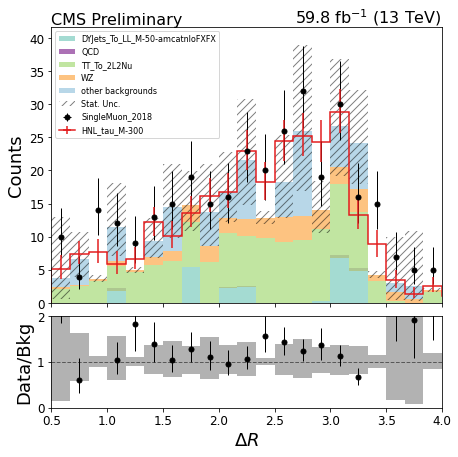

   
Showing  pt_e1
Sum of QCD events in region A: 5.46
Sum of QCD events in region B: -0.23
QCD extrapolation factor from region (B/A): -0.04


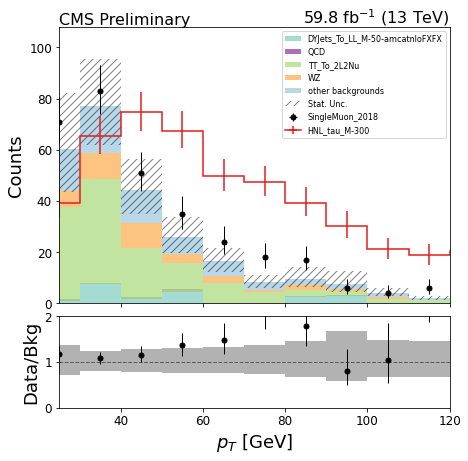

   
Showing  pt_mu1
Sum of QCD events in region A: 5.46
Sum of QCD events in region B: -0.23
QCD extrapolation factor from region (B/A): -0.04


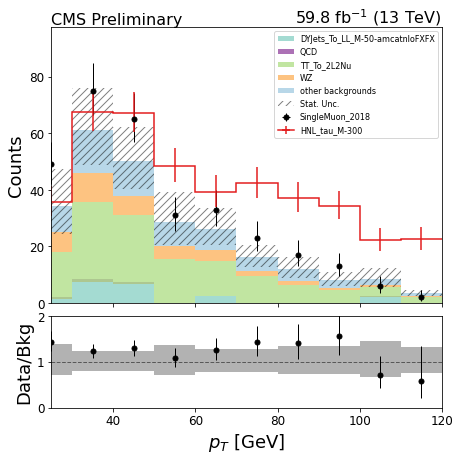

   
Showing  pt_tau1
Sum of QCD events in region A: 5.46
Sum of QCD events in region B: -0.23
QCD extrapolation factor from region (B/A): -0.04


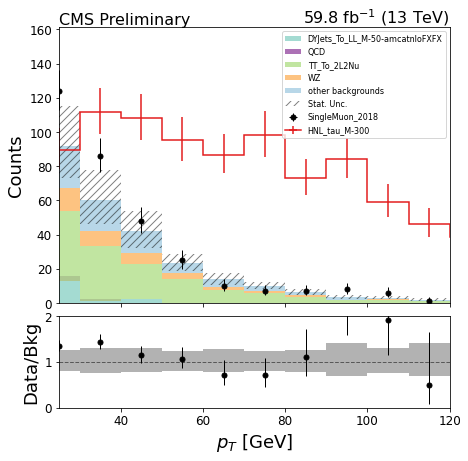

   
Showing  comb_mass_l1l2
Sum of QCD events in region A: 5.46
Sum of QCD events in region B: -0.23
QCD extrapolation factor from region (B/A): -0.04


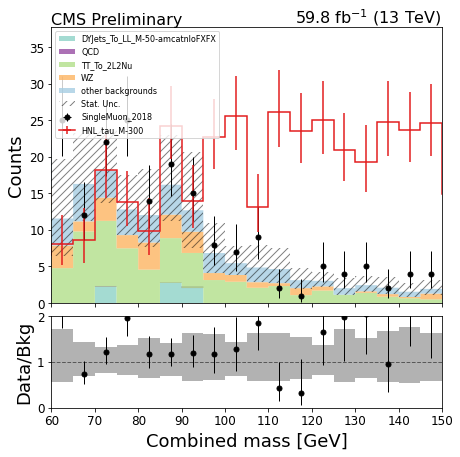

   
Showing  met
Sum of QCD events in region A: 5.46
Sum of QCD events in region B: -0.23
QCD extrapolation factor from region (B/A): -0.04


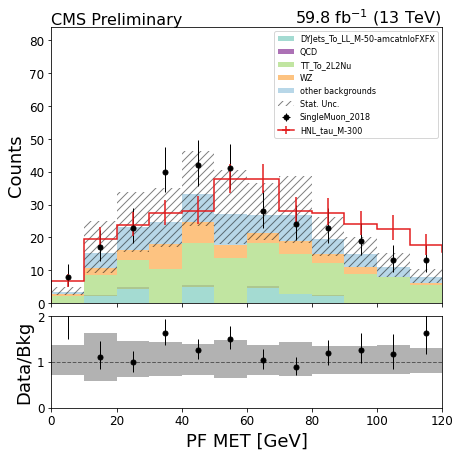

In [2]:
#plot data vs background tem_SS
var_to_plot = [
        'dr_l1l2',
        'pt_e1',
        'pt_mu1',
        'pt_tau1',
        'comb_mass_l1l2',
        'met']

main_background = [
    'DYJets_To_LL_M-50-amcatnloFXFX',
    'TT_To_2L2Nu',
    'WZ']

other_background = [
    'EWK_WMinus2Jets_W_To_LNu_M-50',
    'EWK_WPlus2Jets_W_To_LNu_M-50',
    'EWK_Z2Jets_Z_To_LL_M-50',
    'ST_t-channel_antitop_4f_InclusiveDecays',
    'ST_t-channel_top_4f_InclusiveDecays',
    'ST_tW_antitop_5f_inclusiveDecays',
    'ST_tW_top_5f_inclusiveDecays',
    'TT_To_Hadronic',
    'TT_To_SemiLeptonic',
    'TTWJets_To_LNu',
    'TTWW',
    'TTWZ',
    'TTZ_To_LLNuNu_M-10',
    'WJets_To_LNu',
    'TTZZ',
    'ZZ',
    'WW',
    'WWW',
    'WWZ',
    'WZZ',
    'ZZZ']

print('For channel '+str(channel))

for var in var_to_plot:
    try:
        if (len(result[var].values()) == 0):
            print(var, 'is empty')
            continue

        print('Showing ', var)

        #scaling 
        data_name='SingleMuon_2018'
        lumi = lumi_SingleMuon_2018

        scales = {s:plot_scale[s]*lumi*xsecs[s]/event_counter['sumw'][s] for s in scale_samples}

        result[var].scale(scales, axis='ds')
        result_regionA[var].scale(scales, axis='ds')
        result_regionB[var].scale(scales, axis='ds')
        result_regionC[var].scale(scales, axis='ds')

        # compute QCD background with ABCD method
        QCD_regionA = list(result_regionA[var][data_name].values().values())[0] - sum(list(result_regionA[var][main_background + other_background].values().values()))
        QCD_regionB = list(result_regionB[var][data_name].values().values())[0] - sum(list(result_regionB[var][main_background + other_background].values().values()))
        QCD_regionC = list(result_regionC[var][data_name].values().values())[0] - sum(list(result_regionC[var][main_background + other_background].values().values()))

        QCD_regionA[QCD_regionA < 0] = 0
        QCD_regionB[QCD_regionB < 0] = 0
        QCD_regionC[QCD_regionC < 0] = 0

        #compute scale factor TF = N(B) / N(A)
        step = (var_axis[var[0:2]][2] - var_axis[var[0:2]][1])/var_axis[var[0:2]][0]
        other_background_regionA = 0
        other_background_regionB = 0
        for background in (main_background + other_background):
            other_background_regionA = other_background_regionA + result_regionA['sumw_l3sel'][background]*scales[background]
            other_background_regionB = other_background_regionB + result_regionB['sumw_l3sel'][background]*scales[background]

        NA = result_regionA['sumw_l3sel'][data_name] - other_background_regionA
        NB = result_regionB['sumw_l3sel'][data_name] - other_background_regionB
        TF = NB/NA

        print("Sum of QCD events in region A: {:.2f}".format(NA))
        print("Sum of QCD events in region B: {:.2f}".format(NB))
        print("QCD extrapolation factor from region (B/A): {:.2f}".format(TF))
        
        # QCD background estimation in signal region
        QCD_background = QCD_regionC*TF
        
        # make a nice ratio plot
        data_hist = result[var][data_name]

        BCK_histo = result[var][main_background]

        signal_histo = result[var][hnl]

        cumu_other_bck = np.zeros(var_axis[var[0:2]][0])
        for bck in other_background:
            if result[var][bck].values() == {}:
                pass
            else:
                cumu_other_bck = cumu_other_bck + list(result[var][bck].values().values())[0] #value at each bin

        step = (var_axis[var[0:2]][2] - var_axis[var[0:2]][1])/var_axis[var[0:2]][0]

        # we create the histograms of all the other backgrounds + QCD with ABCD method
        if var[0:2] == 'pt':
            BCK_histo.fill(ds="other backgrounds", pt=np.arange(var_axis[var[0:2]][1], var_axis[var[0:2]][2], step), weight=cumu_other_bck)
            BCK_histo.fill(ds="QCD", pt=np.arange(var_axis[var[0:2]][1], var_axis[var[0:2]][2], step), weight=QCD_background)
    
            data_hist = data_hist.rebin("pt", hist.Bin("pt", r"$p_{T}$ [GeV]", 150, 0., 1500))
            BCK_histo = BCK_histo.rebin("pt", hist.Bin("pt", r"$p_{T}$ [GeV]", 150, 0., 1500))
            signal_histo = signal_histo.rebin("pt", hist.Bin("pt", r"$p_{T}$ [GeV]", 150, 0., 1500))

            ratio_plot_plus_signal(data_hist, BCK_histo, signal_histo, var, save_dir, xlim = [25,120], ylim = 0.3, luminosity = lumi, hnl_list = hnl)

        if var[0:2] == 'mT':
            BCK_histo.fill(ds="other backgrounds", mt=np.arange(var_axis[var[0:2]][1], var_axis[var[0:2]][2], step), weight=cumu_other_bck)
            BCK_histo.fill(ds="QCD", mt=np.arange(var_axis[var[0:2]][1], var_axis[var[0:2]][2], step), weight=QCD_background)

            ratio_plot_plus_signal(data_hist, BCK_histo, signal_histo, var, save_dir, xlim = [0,300], ylim = 1., luminosity = lumi, hnl_list = hnl)

        if var[0:2] == 'dr':
            BCK_histo.fill(ds="other backgrounds", dr=np.arange(var_axis[var[0:2]][1], var_axis[var[0:2]][2], step), weight=cumu_other_bck)
            BCK_histo.fill(ds="QCD", dr=np.arange(var_axis[var[0:2]][1], var_axis[var[0:2]][2], step), weight=QCD_background)

            ratio_plot_plus_signal(data_hist, BCK_histo, signal_histo, var, save_dir, xlim = [0.5,4.], ylim = 0.3, luminosity = lumi, hnl_list = hnl)

        if var[0:2] == 'co':
            BCK_histo.fill(ds="other backgrounds", mc=np.arange(var_axis['mc'][1], var_axis['mc'][2], step), weight=cumu_other_bck)
            BCK_histo.fill(ds="QCD", mc=np.arange(var_axis['mc'][1], var_axis['mc'][2], step), weight=QCD_background)

            ratio_plot_plus_signal(data_hist, BCK_histo, signal_histo, var, save_dir, xlim = [60,150], ylim = 0.3, luminosity = lumi, hnl_list = hnl)

        if var[0:2] == 'me':
            BCK_histo.fill(ds="other backgrounds", met=np.arange(var_axis[var[0:2]][1], var_axis[var[0:2]][2], step), weight=cumu_other_bck)
            BCK_histo.fill(ds="QCD", met=np.arange(var_axis[var[0:2]][1], var_axis[var[0:2]][2], step), weight=QCD_background)

            ratio_plot_plus_signal(data_hist, BCK_histo, signal_histo, var, save_dir, xlim = [0,120], ylim = 1., luminosity = lumi, hnl_list = hnl)

        print('   ')
        warnings.filterwarnings("default")
    except AssertionError:
        pass


In [ ]:
#sumary tab xsec
print(f'| {"Backgrounds":<43}', end='')
print(f'| {"cross-section   ":<15}', end='')
print(f'| {"total sumw      |":<5}', end='\n')

print(u'\u2500' * 81)
for name, cs in list(xsecs.items()):
    print(f'| {name:<43}', end='')
    print(f'| {cs:<15} ', end='')
    temp = str(round(event_counter['sumw'][name],3))
    print(f'| {temp:<15} |', end='\n')

    print(u'\u2500' * 81)